In [8]:
# this file is for predicting renewable energy in future.

In [9]:

pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\Sumit\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [10]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\Sumit\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [11]:
pip install prophet matplotlib


  Using cached prophet-1.1.5-py3-none-win_amd64.whl.metadata (3.6 kB)
Using cached prophet-1.1.5-py3-none-win_amd64.whl (13.3 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\Sumit\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\prophet\\stan_model\\cmdstan-2.33.1\\stan\\lib\\stan_math\\lib\\tbb_2020.3\\include\\tbb\\internal\\_deprecated_header_message_guard.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\Sumit\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


C:\Users\Sumit\AppData\Local\Temp\ipykernel_15444\3701077699.py:40: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_dates = pd.date_range(start='2025-01-01', periods=5, freq='Y')


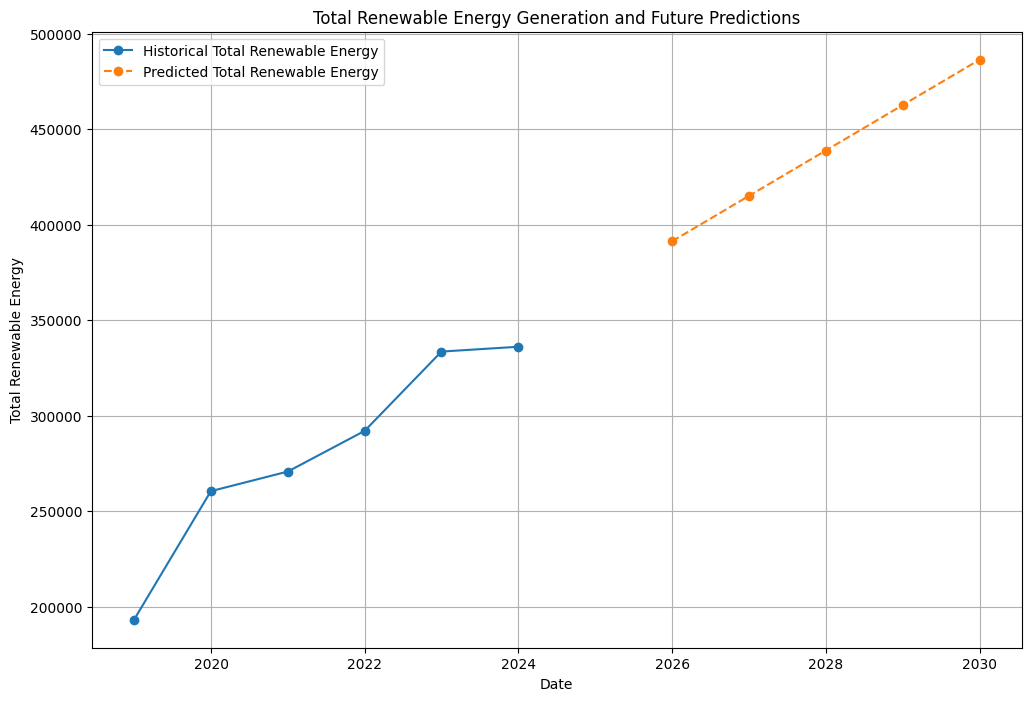

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create a dictionary with the data
data = {
    'Date': ['2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31', '2022-12-31', '2023-12-31', '2024-12-31'],
    'SolarGen': [None, 43219.0000, 53054.0000, 65292.0000, 88956.0000, 105399.8670, 71647.3789],
    'WindGen': [56199.000, 57428.000, 53237.000, 64328.000, 69223.000, 79448.989, 46314.673],
    'HydroGen': [136905.00000, 159799.00000, 164436.00000, 162418.00000, 175381.00000, 151236.15665, None]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Remove data for the year 2024
df = df[df['Date'] != '2024-12-31']

# Convert 'Date' to datetime and then to numerical format (e.g., ordinal)
df['Date'] = pd.to_datetime(df['Date'])
df['Date_ordinal'] = df['Date'].apply(lambda x: x.toordinal())

# Calculate the total renewable energy
df['TotalRenewable'] = df[['SolarGen', 'WindGen', 'HydroGen']].sum(axis=1)

# Prepare data for regression
X = df[['Date_ordinal']]
y = df['TotalRenewable']

# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict future values
future_dates = pd.date_range(start='2025-01-01', periods=5, freq='Y')
future_dates_ordinal = future_dates.map(lambda x: x.toordinal())
future_X = pd.DataFrame(future_dates_ordinal, columns=['Date_ordinal'])
future_predictions = model.predict(future_X)

# Plot historical data
plt.figure(figsize=(12, 8))
plt.plot(df['Date'], df['TotalRenewable'], label='Historical Total Renewable Energy', marker='o')

# Plot future predictions
plt.plot(future_dates, future_predictions, label='Predicted Total Renewable Energy', linestyle='--', marker='o')

# Add titles and labels
plt.title('Total Renewable Energy Generation and Future Predictions')
plt.xlabel('Date')
plt.ylabel('Total Renewable Energy')
plt.legend()
plt.grid(True)
plt.show()
